# Import of Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Load of data set using pandas 

In [5]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

# Brief view of data 

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(32561, 15)

In [8]:
def handle_capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan, 0)

In [9]:
handle_capital_gain(df)

In [10]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


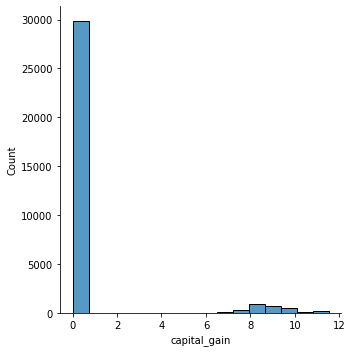

In [11]:
sns.displot(df['capital_gain'])

In [12]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [14]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Removing outliers from hours_per_week

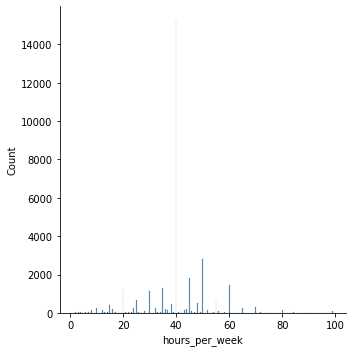

In [15]:
sns.displot(df['hours_per_week'])

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

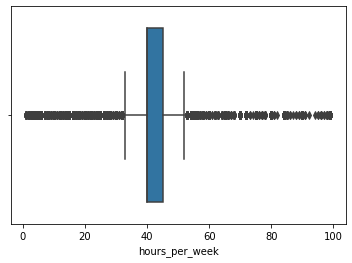

In [16]:
sns.boxplot(df['hours_per_week'])

In [17]:
def remove_outlier_hours_per_week(df):
    IQR = df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)
    
    lower_range = df['hours_per_week'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['hours_per_week'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

In [18]:
remove_outlier_hours_per_week(df)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

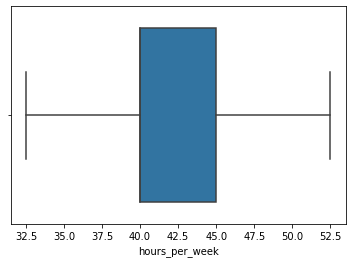

In [19]:
sns.boxplot(df['hours_per_week'])

## Removing outliers from education_num

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education_num', ylabel='Density'>

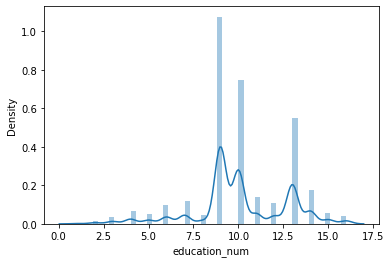

In [20]:
sns.distplot(df['education_num'])

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

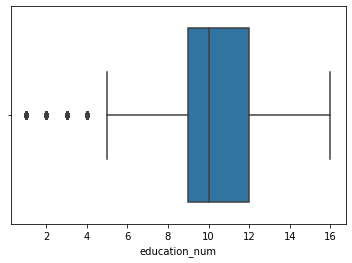

In [21]:
sns.boxplot(df['education_num'])

In [22]:
def remove_outlier_education_num(df):
    IQR = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    
    lower_range = df['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['education_num'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

In [23]:
remove_outlier_education_num(df)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

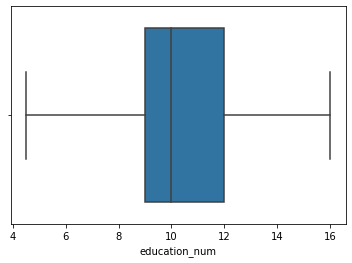

In [24]:
sns.boxplot(df['education_num'])

## Removing outliers from captial_loss

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

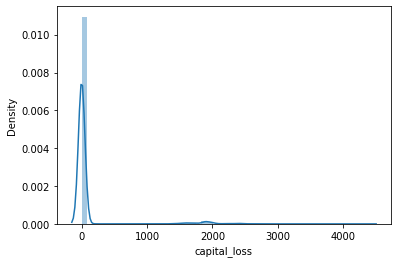

In [25]:
sns.distplot(df['capital_loss'])

In [26]:
def capital_loss_log(df):
    df['capital_loss'] = np.where(df['capital_loss'] == 0, np.nan, df['capital_loss'])
    df['capital_loss'] = np.log(df['capital_loss'])
    df['capital_loss'] = df['capital_loss'].replace(np.nan, 0)

In [27]:
capital_loss_log(df)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

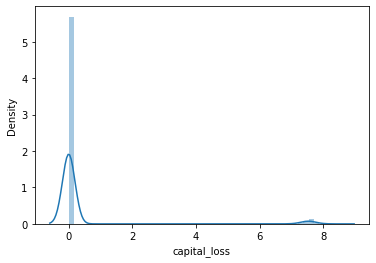

In [29]:
sns.distplot(df['capital_loss'])

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

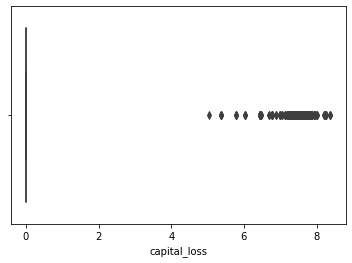

In [30]:
sns.boxplot(df['capital_loss'])

In [31]:
def remove_outlier_capital_loss(df):
    IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    
    lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

In [32]:
remove_outlier_capital_loss(df)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

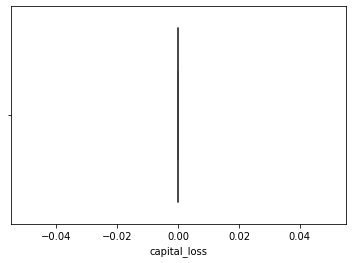

In [33]:
sns.boxplot(df['capital_loss'])

In [34]:
def feature_engineering(df):
    
    ## convert the salary into 1 if salary is greater then 50K else 0
#     df['salary'] = df['salary'].replace(' >50K', '>50K')
#     df['salary'] = np.where(df['salary'] > '50K', 1, 0)
    
    ## convert the sex column into 0 and 1, if male then 1 else 0
    df['sex'] = np.where(df['sex'] == " Male", 1, 0)
     
    ## do the label encoding in race column (0: 'White',1: 'Black',2: 'Asian-Pac-Islander',3:'Amer-Indian-Eskimo',4:'Other')
    label_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(label_enco_race)
    
    ## {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative
    label_enco_relation = {value: key for key, value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(label_enco_relation)
    
    ## {0: ' Adm-clerical',1: ' Exec-managerial',2: ' Handlers-cleaners',3: ' Prof-specialty',4: ' Other-service',5: ' Sales', 6: ' Craft-repair',7: ' Transport-moving',8: ' Farming-fishing',9: ' Machine-op-inspct', 10: ' Tech-support', 11: ' ?',12: ' Protective-serv',13: ' Armed-Forces', 14: ' Priv-house-serv'}
    df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
    label_enco_occu = {value: key for key, value in enumerate(df['occupation'].unique())}
    ## Replacing ? value with 'Missing'
    df['occupation'] = df['occupation'].map(label_enco_occu)
    
    ## {0: ' Never-married',1: ' Married-civ-spouse',2: ' Divorced',3: ' Married-spouse-absent',4: ' Separated',5: ' Married-AF-spouse',6: ' Widowed'}
    label_enco_marital_status = {value: key for key, value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(label_enco_marital_status)
    
    label_enco_edu = {value: key for key, value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(label_enco_edu)
    
    ## {0: ' State-gov'1: ' Self-emp-not-inc',2: ' Private',3: ' Federal-gov',4: ' Local-gov',5: ' ?',6: ' Self-emp-inc',7: ' Without-pay',8: ' Never-worked'}
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
    label_enco_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(label_enco_workclass)
    
    ## {' United-States': 0,' Cuba': 1,' Jamaica': 2,' India': 3,' ?': 4,' Mexico': 5,' South': 6,' Puerto-Rico': 7,' Honduras': 8,' England': 9,' Canada': 10,' Germany': 11,' Iran': 12,' Philippines': 13,' Italy': 14,' Poland': 15,' Columbia': 16,' Cambodia': 17,' Thailand': 18,' Ecuador': 19,' Laos': 20,' Taiwan': 21,' Haiti': 22,' Portugal': 23,' Dominican-Republic': 24,' El-Salvador': 25,' France': 26,' Guatemala': 27,' China': 28,' Japan': 29,' Yugoslavia': 30,' Peru': 31,' Outlying-US(Guam-USVI-etc)': 32,' Scotland': 33,' Trinadad&Tobago': 34,' Greece': 35,' Nicaragua': 36,' Vietnam': 37,' Hong': 38,' Ireland': 39,' Hungary': 40,' Holand-Netherlands': 41
    df['native_country'] = np.where(df['native_country'] == ' ?', 'Missing', df['native_country'])
    label_enco_workclass = {value: key for key, value in enumerate(df['native_country'].unique())}
    df['native_country'] = df['native_country'].map(label_enco_workclass)

<AxesSubplot:>

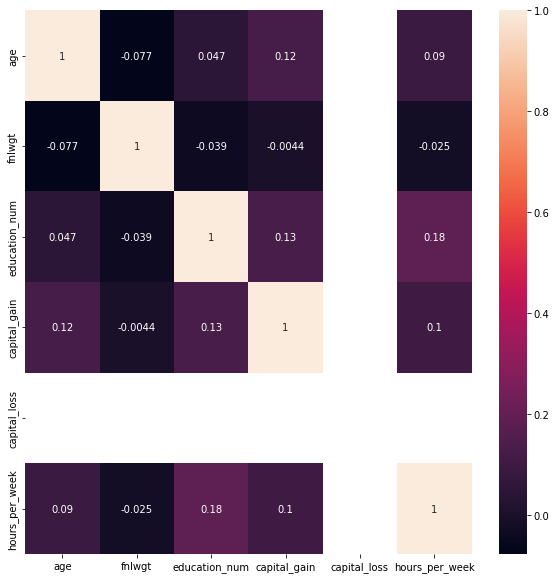

In [35]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [36]:
df = df.drop('fnlwgt', axis=1)

In [37]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [39]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


## After doing feature Engineering

In [40]:
feature_engineering(df)

In [41]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,1,7.684324,0.0,40.0,0,<=50K
1,50,1,0,13.0,1,1,1,0,1,0.000000,0.0,32.5,0,<=50K
2,38,2,1,9.0,2,2,0,0,1,0.000000,0.0,40.0,0,<=50K
3,53,2,2,7.0,1,2,1,1,1,0.000000,0.0,40.0,0,<=50K
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,<=50K


## train_test_split

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
sc = StandardScaler()

In [44]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [45]:
y = df['salary']

In [46]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [47]:
X = sc.fit_transform(X)

In [48]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (26048, 13)
Test data shape: (6513, 13)


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lg_model = LogisticRegression()

In [53]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = lg_model.predict(X_test)

In [56]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [134]:
pd.DataFrame(result)

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,1
5667,0,0
7827,0,1
...,...,...
1338,0,1
24534,1,0
18080,1,1
10354,0,0


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [58]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8182097343773991
Confusion Matrix:
 [[4626  316]
 [ 868  703]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4942
        >50K       0.69      0.45      0.54      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513



In [59]:
test = pd.read_csv('adult_test.csv')
test.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

FileNotFoundError: [Errno 2] No such file or directory: 'adult_test.csv'

In [224]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [232]:
test.salary = np.where(test.salary > ' 50K', 1, 0)

In [233]:
test.salary.value_counts()

1    16281
Name: salary, dtype: int64

In [166]:
handle_capital_gain(test)

In [167]:
remove_outlier_hours_per_week(test)

In [168]:
remove_outlier_education_num(test)

In [169]:
capital_loss_log(test)

In [170]:
remove_outlier_capital_loss(test)

In [171]:
feature_engineering(test)

In [172]:
x_test_feature = test[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [173]:
x_test_label = test['salary']

In [174]:
x_test_label.value_counts()

0    16281
Name: salary, dtype: int64

In [175]:
x_test_feature.sex.value_counts()

1    10860
0     5421
Name: sex, dtype: int64